In [6]:
import pandas as pd
from sklearn.calibration import LabelEncoder
import smogn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
import pandas as pd
from scipy.stats import skew

Skewness before Box-Cox Transformation: -0.7677252641243315
Median before Box-Cox Transformation: 71.0
Mean before Box-Cox Transformation: 68.41131284916202


Skewness after Box-Cox Transformation: -0.18119428342618965


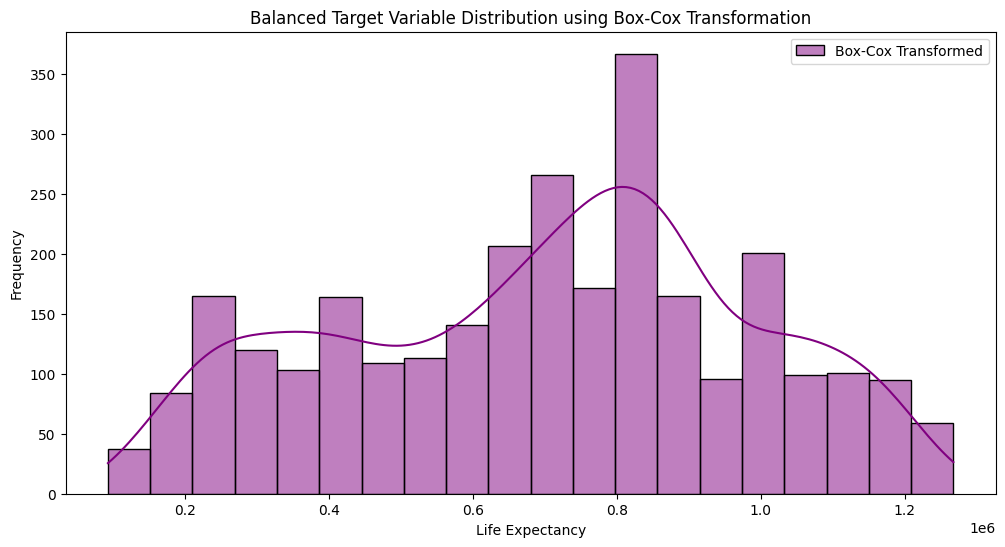

   Country  Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
0      164  2015             11                 13              105   
1      148  2015              2                  3               57   
2       74  2007             51                 67              201   
3       69  2006             32                 40              222   
4       79  2012              3                  4               57   
5       39  2006              9                 11               95   
6      133  2015              6                  8              223   
7       72  2000              8                 10              192   
8       83  2001             22                 26              129   
9      107  2008             15                 17              217   

   Alcohol_consumption  Hepatitis_B  Measles  BMI  Polio  ...  \
0                    1           97       65   27     97  ...   
1                   10           97       94   26     97  ...   
2                    1 

In [7]:
# Load dataset
df = pd.read_csv('../data/data.csv')

# Label encoding for 'Country' due to high dimensionality
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# One-hot encoding for 'Region' due to low dimensionality
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)
df_encoded = df_encoded.astype(int)

# Separate features and target variable
X = df_encoded.drop(columns='Life_expectancy')
y = df_encoded['Life_expectancy']

# Apply Box-Cox transformation to the target (Life Expectancy)
# Box-Cox only accepts positive values, which are satisfied in life expectancy data
y_boxcox, lambda_val = boxcox(y)  # Store the lambda value for inverse transformation later if needed

# Updated feature matrix (X) and transformed target (y_boxcox)
X_transformed = X
y_transformed = pd.Series(y_boxcox, name="Life_expectancy_BoxCox")

skewness_original = skew(y)  # Skewness of original target
median_original = y.median()  # Median of original target
mean_origial = y.mean()  # Mean of original target

skewness_boxcox = skew(y_transformed)  # Skewness of Box-Cox transformed target

# Print results
print("Skewness before Box-Cox Transformation:", skewness_original)
print("Median before Box-Cox Transformation:", median_original)
print("Mean before Box-Cox Transformation:", mean_origial)
print("\n")
print("Skewness after Box-Cox Transformation:", skewness_boxcox)

# After balancing
plt.figure(figsize=(12, 6))
sns.histplot(y_transformed, kde=True, color='purple', label='Box-Cox Transformed')
plt.title("Balanced Target Variable Distribution using Box-Cox Transformation")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(df_encoded.head(10))

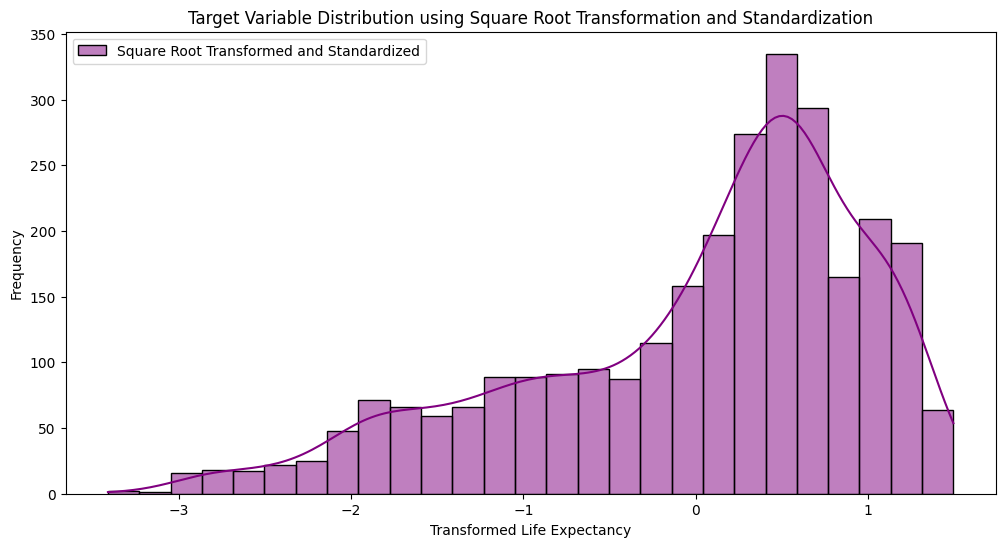

Skewness before Square Root Transformation: -0.7698381425050179
Skewness after Square Root Transformation: -0.905120903318291
Skewness after Square Root Transformation and Standardization: -0.9051209033182992


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('../data/data.csv')

# Label encoding for 'Country' due to high dimensionality
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# One-hot encoding for 'Region' due to low dimensionality
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop(columns='Life_expectancy')
y = df_encoded['Life_expectancy']

# Apply square root transformation to the target variable
y_sqrt = np.sqrt(y)

# Standardizing the transformed target
y_sqrt_standardized = (y_sqrt - y_sqrt.mean()) / y_sqrt.std()

# Updated feature matrix (X) and transformed, standardized target (y_sqrt_standardized)
X_transformed = X
y_transformed = pd.Series(y_sqrt_standardized, name="Life_expectancy_Sqrt_Standardized")

# Plot the distribution of the square root transformed target
plt.figure(figsize=(12, 6))
sns.histplot(y_transformed, kde=True, color='purple', label='Square Root Transformed and Standardized')
plt.title("Target Variable Distribution using Square Root Transformation and Standardization")
plt.xlabel("Transformed Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Calculate skewness before and after the square root transformation
skewness_original = skew(y)  # Original skewness
skewness_sqrt = skew(y_sqrt)  # Skewness after square root transformation
skewness_sqrt_standardized = skew(y_sqrt_standardized)  # Skewness after standardization

# Print skewness results
print("Skewness before Square Root Transformation:", skewness_original)
print("Skewness after Square Root Transformation:", skewness_sqrt)
print("Skewness after Square Root Transformation and Standardization:", skewness_sqrt_standardized)


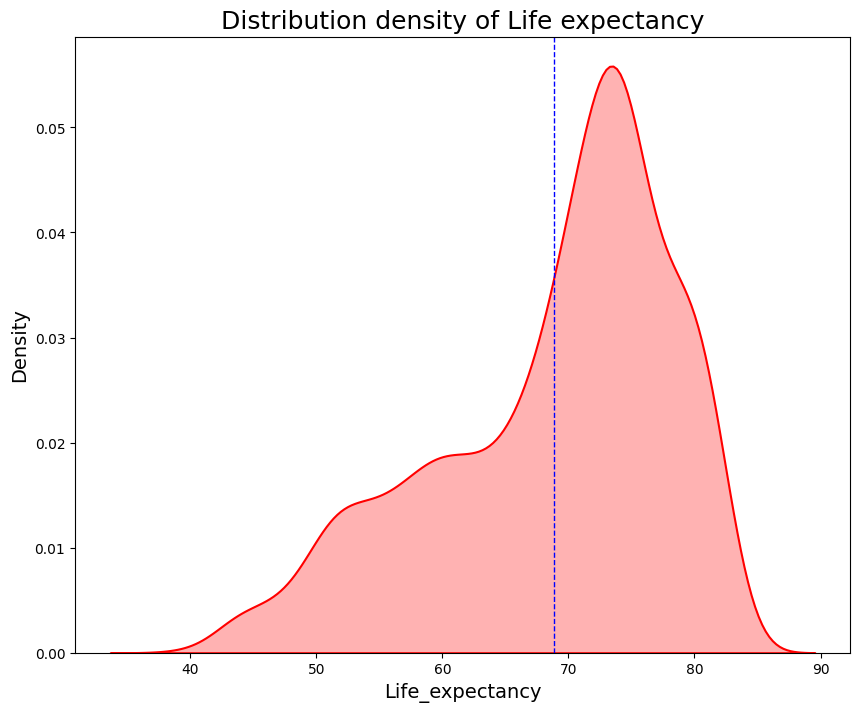

Skewness: [-0.7698381425050179]


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to set plot dimensions
def set_plot_dimensions(width, height):
    plt.figure(figsize=(width, height))

# Assuming 'data' is a pandas DataFrame with a column 'Life.expectancy'
# Set plot dimensions
set_plot_dimensions(10, 8)

# Density plot
sns.kdeplot(df['Life_expectancy'], fill=True, color="red", alpha=0.3, linewidth=1.5)
plt.axvline(df['Life_expectancy'].mean(), color='blue', linestyle='--', linewidth=1)
plt.title("Distribution density of Life expectancy", fontsize=18)
plt.xlabel("Life_expectancy", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

# Calculating and displaying skewness
skewness_value = skew(df['Life_expectancy'].dropna())
print(f"Skewness: [{skewness_value}]")

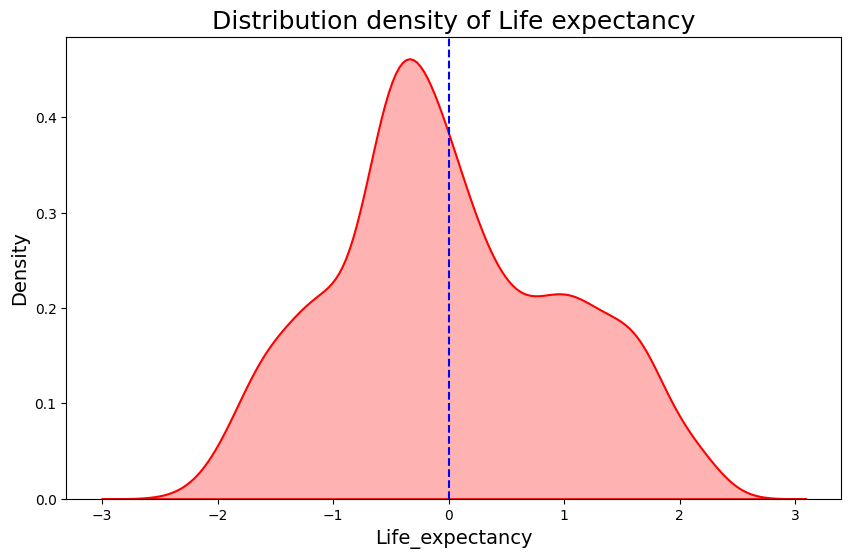

Skewness: [0.21393733678947732]


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/data.csv')

# Label encoding for 'Country' due to high dimensionality
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# One-hot encoding for 'Region' due to low dimensionality
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop(columns='Life_expectancy')
y = df_encoded['Life_expectancy']

# Assuming 'data' is a pandas DataFrame with a column 'Life.expectancy'
df['Life_expectancy'] = np.sqrt(df['Life_expectancy'].max() + 1 - df['Life_expectancy'])

# Standardizing the 'Life.expectancy' column
df['Life_expectancy'] = (df['Life_expectancy'] - df['Life_expectancy'].mean()) / df['Life_expectancy'].std()

# Plotting the density
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Life_expectancy'], fill=True, color="red", alpha=0.3, linewidth=1.5)
plt.axvline(df['Life_expectancy'].mean(), color='blue', linestyle='--')
plt.title("Distribution density of Life expectancy", fontsize=18)
plt.xlabel("Life_expectancy", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

# Calculating and displaying skewness
skewness_value = skew(df['Life_expectancy'].dropna())
print(f"Skewness: [{skewness_value}]")

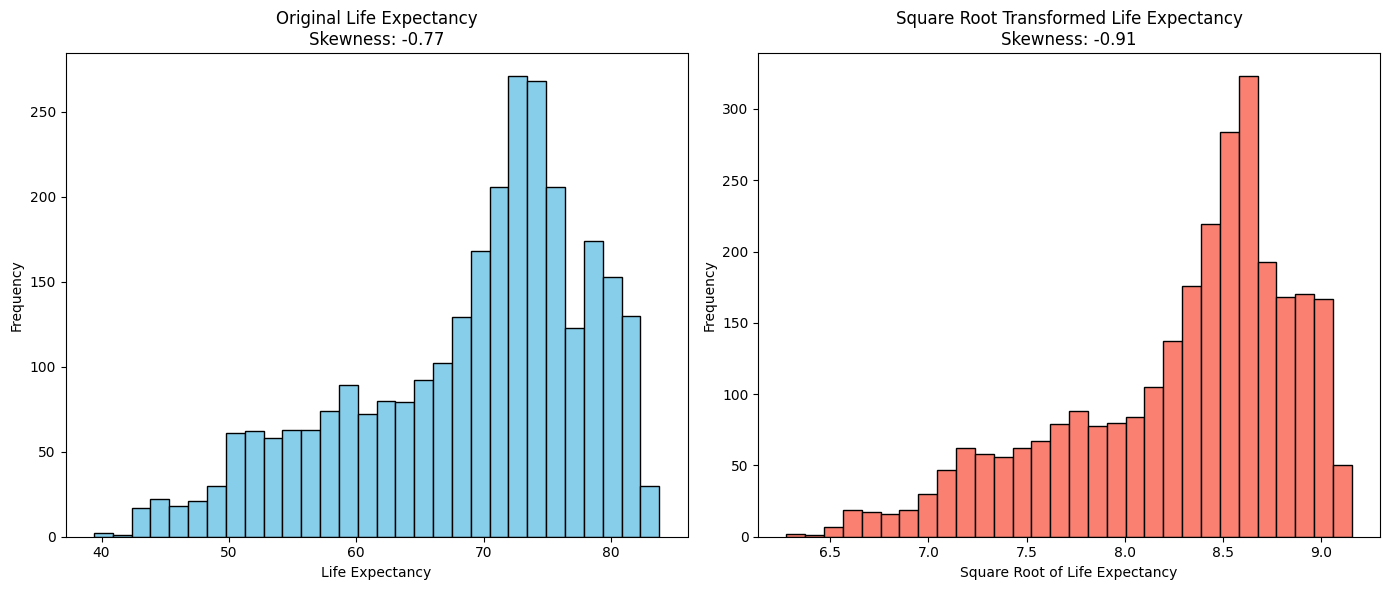

In [11]:
from scipy.stats import skew

# Load dataset
df = pd.read_csv('../data/data.csv')

# Label encoding for 'Country' due to high dimensionality
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# One-hot encoding for 'Region' due to low dimensionality
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# Apply square root transformation to the target variable 'Life_expectancy'
df_encoded['Life_expectancy_sqrt'] = np.sqrt(df_encoded['Life_expectancy'])

# Separate features and transformed target variable
X = df_encoded.drop(columns=['Life_expectancy', 'Life_expectancy_sqrt'])
y = df_encoded['Life_expectancy_sqrt']

# Calculate skewness before and after transformation
original_skewness = skew(df['Life_expectancy'])
transformed_skewness = skew(df_encoded['Life_expectancy_sqrt'])

# Plotting histograms of original and square root transformed Life_expectancy
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original Life Expectancy distribution
axs[0].hist(df['Life_expectancy'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title(f'Original Life Expectancy\nSkewness: {original_skewness:.2f}')
axs[0].set_xlabel('Life Expectancy')
axs[0].set_ylabel('Frequency')

# Transformed Life Expectancy distribution
axs[1].hist(df_encoded['Life_expectancy_sqrt'], bins=30, color='salmon', edgecolor='black')
axs[1].set_title(f'Square Root Transformed Life Expectancy\nSkewness: {transformed_skewness:.2f}')
axs[1].set_xlabel('Square Root of Life Expectancy')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# Load dataset and encode as per previous steps
df = pd.read_csv('../data/data.csv')
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# Apply log transformation to 'Life_expectancy' for linear modeling
df_encoded['Life_expectancy_log'] = np.log(df_encoded['Life_expectancy'])

# Separate features and log-transformed target variable
X = df_encoded.drop(columns=['Life_expectancy', 'Life_expectancy_log'])
y_log = df_encoded['Life_expectancy_log']

# Calculate skewness for the transformed target variable
log_skewness = skew(y_log)

X.head(), y_log.head(), log_skewness

(   Country  Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
 0      164  2015           11.1               13.0         105.8240   
 1      148  2015            2.7                3.3          57.9025   
 2       74  2007           51.5               67.9         201.0765   
 3       69  2006           32.8               40.5         222.1965   
 4       79  2012            3.4                4.3          57.9510   
 
    Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  ...  \
 0                 1.32           97       65  27.8     97  ...   
 1                10.35           97       94  26.0     97  ...   
 2                 1.57           60       35  21.2     67  ...   
 3                 5.68           93       74  25.3     92  ...   
 4                 2.89           97       89  27.0     94  ...   
 
    Economy_status_Developed  Economy_status_Developing  Region_Asia  \
 0                         0                          1        False   
 1                

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

df = pd.read_csv('../data/data.csv')

df = df.drop(columns=['Country', 'Year', 'Region'])

X = df.drop(columns='Life_expectancy')
y = df['Life_expectancy']

# Bin 'Life_expectancy' to create balanced intervals for resampling
df['Life_expectancy_bin'] = pd.cut(y, bins=np.arange(40, 90, 5))

# Initialize a DataFrame for balanced data
balanced_data = pd.DataFrame()

# Resample each bin to ensure balanced distribution with 100 samples per bin
for life_bin in df['Life_expectancy_bin'].unique():
    bin_data = df[df['Life_expectancy_bin'] == life_bin]  # Filter data for the current bin
    if len(bin_data) > 0:
        bin_sample = resample(bin_data, replace=True, n_samples=100, random_state=1) 
        balanced_data = pd.concat([balanced_data, bin_sample])

# Drop the temporary 'Life_expectancy_bin' column
balanced_data = balanced_data.drop(columns=['Life_expectancy_bin'])

# Separate features and target variable after balancing
X_balanced = balanced_data.drop(columns='Life_expectancy')
y_balanced = balanced_data['Life_expectancy']

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=1)

balanced_data.shape

(900, 18)

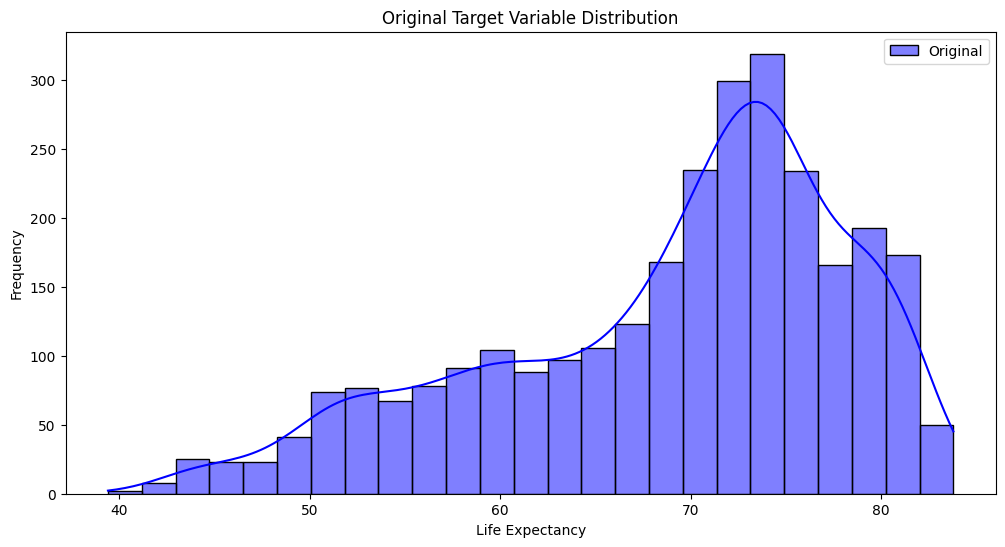

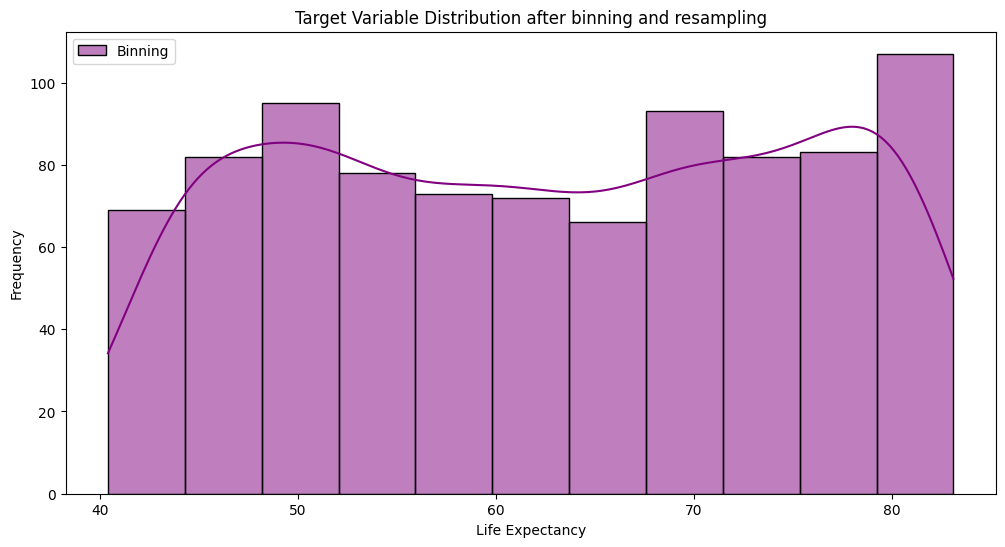

In [16]:
# Original target variable distribution
plt.figure(figsize=(12, 6))
sns.histplot(y, kde=True, color='blue', label='Original')
plt.title("Original Target Variable Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# After balancing
plt.figure(figsize=(12, 6))
sns.histplot(y_balanced, kde=True, color='purple', label='Binning')
plt.title("Target Variable Distribution after binning and resampling")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [17]:
# Handle imbalance using SMOGN, so that the regression models will not be overly influenced by overrepresented ranges of the target variable
# SMOGN is a method designed to balance continous target variables in regression problems
# It first divides the data into ranges based on spesific distance measures, then identifies the intervals that have fewer samples
# and generate synthetic samples for these intervals. It uses a combination of KNN and Gaussian noise to generate the synthetic samples.
# The method is based on the SMOTE algorithm, which is used for balancing classification problems.
data_for_smogn = X.copy()
data_for_smogn['Life_expectancy'] = y

data_smogn = smogn.smoter(data=data_for_smogn, y='Life_expectancy', k=5, samp_method='extreme', rel_thres=0.8)

# Fill missing values in the synthetic data
data_smogn = data_smogn.fillna(data_smogn.mean())

X_resampled = data_smogn.drop(columns=['Life_expectancy'])
y_resampled = data_smogn['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

r_index: 100%|##########| 155/155 [00:00<00:00, 1879.10it/s]


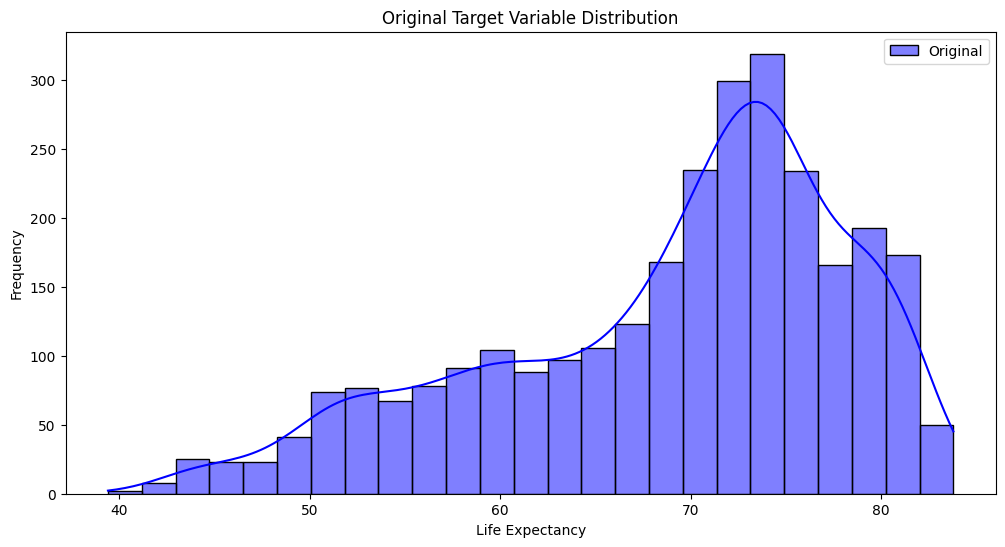

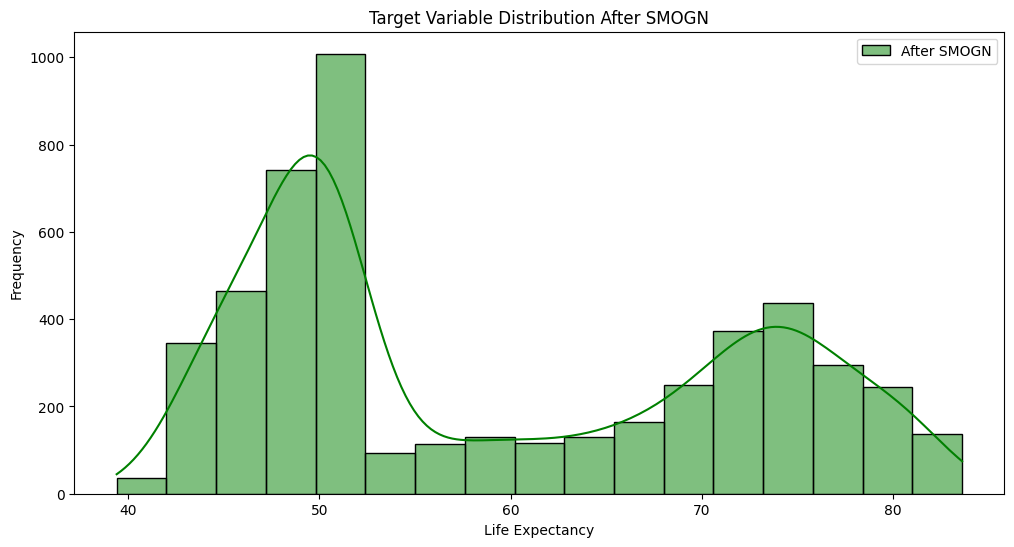

In [18]:
# Original target variable distribution
plt.figure(figsize=(12, 6))
sns.histplot(y, kde=True, color='blue', label='Original')
plt.title("Original Target Variable Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# After applying SMOGN
plt.figure(figsize=(12, 6))
sns.histplot(y_resampled, kde=True, color='green', label='After SMOGN')
plt.title("Target Variable Distribution After SMOGN")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()